In [40]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_of_trainImgs = x_train.shape[0] #60000 here
num_of_testImgs = x_test.shape[0] #10000 here
img_width = 28
img_height = 28
 
x_train = x_train.reshape(x_train.shape[0], img_height, img_width, 1)
x_test = x_test.reshape(x_test.shape[0], img_height, img_width, 1)
input_shape = (img_height, img_width, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(128, kernel_size=(4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

data_generator = ImageDataGenerator(
                        rotation_range=10,
                        width_shift_range=0.25,
                        height_shift_range=0.25,
                        zoom_range=.5,
                        horizontal_flip=False)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, steps_per_epoch=len(x_train) // 256,
                        epochs=12, verbose=1,
                        validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('trained_model5.h5')
print("Done")

Epoch 1/12
234/234 [==============================] - 127s 541ms/step - loss: 0.4735 - accuracy: 0.8493 - val_loss: 0.1011 - val_accuracy: 0.9685
Epoch 2/12
234/234 [==============================] - 122s 522ms/step - loss: 0.1126 - accuracy: 0.9667 - val_loss: 0.0686 - val_accuracy: 0.9797
Epoch 3/12
234/234 [==============================] - 117s 498ms/step - loss: 0.0787 - accuracy: 0.9768 - val_loss: 0.0480 - val_accuracy: 0.9847
Epoch 4/12
234/234 [==============================] - 118s 505ms/step - loss: 0.0645 - accuracy: 0.9806 - val_loss: 0.0449 - val_accuracy: 0.9863
Epoch 5/12
234/234 [==============================] - 130s 557ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0432 - val_accuracy: 0.9867
Epoch 6/12
234/234 [==============================] - 122s 521ms/step - loss: 0.0464 - accuracy: 0.9862 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 7/12
234/234 [==============================] - 114s 488ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0428 -

No handles with labels found to put in legend.


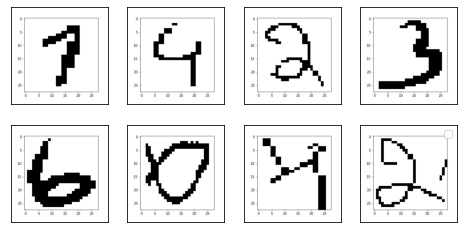

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

plt.figure(figsize = (8, 4))

for i in range(8) :
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.imread("recog_ans6_" + str(3+i) + ".jpeg"), cmap = "gray")
    # plt.title("Digit-"+str(np.argmax(y_train[i])))
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.legend()

In [34]:
count = {i:0 for i in range(10)}
for i in y_train :
    count[np.argmax(i)] += 1

print(count)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [35]:
count = {i:0 for i in range(10)}
for i in y_test :
    count[np.argmax(i)] += 1

print(count)

{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [38]:
print(x_train[1].reshape(28, 28))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    